In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [59]:
# loading data from disk.
model_archs = [
    "lstm", "bert-base-uncased", 
    "roberta-base", "gpt2", 
    "e2e-lstm", "e2e-bert-base-uncased",
    "e2e-roberta-base", "e2e-gpt2",
    # baselins
    "ApproxCtf-lstm", "ApproxCtf-bert-base-uncased",
    "ApproxCtf-roberta-base", "ApproxCtf-gpt2",
    
    "SLearner-lstm", "SLearner-bert-base-uncased",
    "SLearner-roberta-base", "SLearner-gpt2",
    
    "ATEExplainer-lstm", "ATEExplainer-bert-base-uncased",
    "ATEExplainer-roberta-base", "ATEExplainer-gpt2",
    
    "CaCEExplainer-lstm", "CaCEExplainer-bert-base-uncased",
    "CaCEExplainer-roberta-base", "CaCEExplainer-gpt2",
    
    "Random-lstm", "Random-bert-base-uncased",
    "Random-roberta-base", "Random-gpt2"
    # gpt3
]
results = {}
for model_arch in model_archs:
    csv_mean = f"./csv-results/{model_arch}-ks-mean.csv"
    csv_std = f"./csv-results/{model_arch}-ks-std.csv"
    mean_df = pd.read_csv(csv_mean).sort_values(by=['k'])
    std_df = pd.read_csv(csv_std).sort_values(by=['k'])
    
    ks_mean = {
        "ICaCE-L2" : np.array(mean_df["ICaCE-L2"].tolist()),
        "ICaCE-cosine" : np.array(mean_df["ICaCE-cosine"].tolist()),
        "ICaCE-normdiff" : np.array(mean_df["ICaCE-normdiff"].tolist()),
        "macro-f1" : np.array(mean_df["macro-f1"].tolist())
    }
    
    ks_std = {
        "ICaCE-L2" : np.array(std_df["ICaCE-L2"].tolist()),
        "ICaCE-cosine" : np.array(std_df["ICaCE-cosine"].tolist()),
        "ICaCE-normdiff" : np.array(std_df["ICaCE-normdiff"].tolist()),
        "macro-f1" : np.array(std_df["macro-f1"].tolist())
    }
    
    results[model_arch] = {
        "mean" : ks_mean,
        "std" : ks_std
    }
    
    ks = mean_df["k"].tolist()
# loading non-CPM results.


In [60]:
def make_single_plot(ax, x, y, y_std, color, marker, ylims, label=None):
    ax.plot(x, y, color=color, marker=marker, markersize=8, label=label)
    ax.fill_between(x, y-y_std, y+y_std, color=color, alpha=0.1)
    ax.set_ylim(ylims[0], ylims[1])
    ax.set_xticks(x)
    ax.set_xscale('log')
    return ax

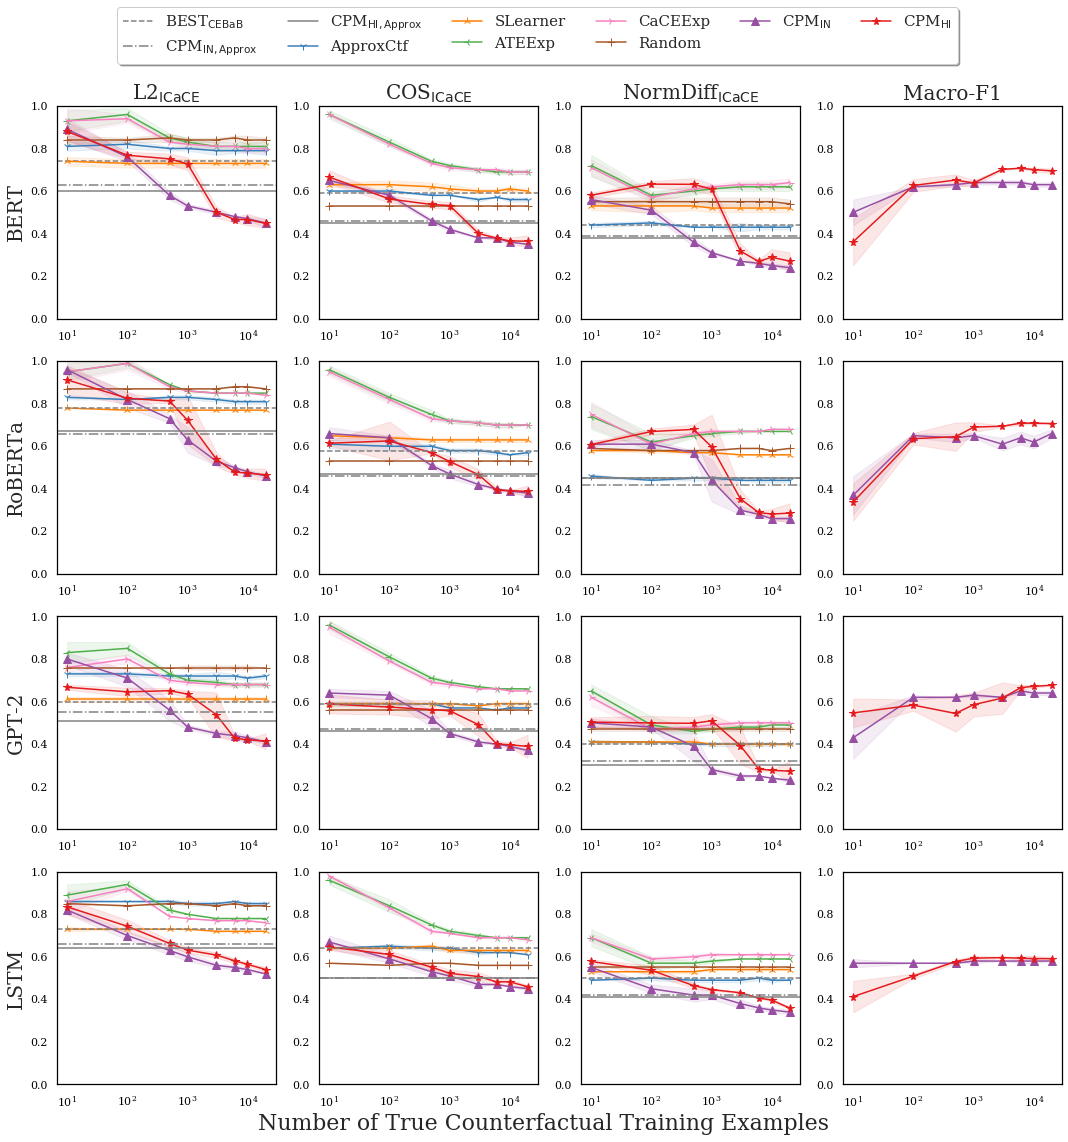

In [62]:
plt.rcParams["font.family"] = "DejaVu Serif"
font = {'family' : 'DejaVu Serif',
        'size'   : 20}
plt.rc('font', **font)
items = ["ICaCE-L2", "ICaCE-cosine", "ICaCE-normdiff", "macro-f1"]
CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#e41a1c', '#dede00']

explainers_to_plot = [
    "ApproxCtf",
    "SLearner",
    "ATEExplainer",
    "CaCEExplainer",
    "Random",
    "e2e",
    "",
]
explainers_labels_map = {
    "ApproxCtf" : "ApproxCtf",
    "SLearner" : "SLearner",
    "ATEExplainer" : "ATEExp",
    "CaCEExplainer" : "CaCEExp",
    "Random" : "Random",
    "e2e" : r'CPM$_{\rm IN}$',
    "" : r'CPM$_{\rm HI}$',
}
explainers_markers_map = {
    "ApproxCtf" : "1",
    "SLearner" : "2",
    "ATEExplainer" : "3",
    "CaCEExplainer" : "4",
    "Random" : "+",
    "e2e" : "^",
    "" : "*",
}

with plt.rc_context({
    'axes.edgecolor':'black', 'xtick.color':'black', 
    'ytick.color':'black', 'axes.facecolor':'white', 
}):
    fig, axs = plt.subplots(4, 4, figsize=(18, 18))
    
    axs[0,0].axhline(y=0.74, color='grey', linestyle='--', label=r'BEST$_{\rm CEBaB}$')
    axs[0,0].axhline(y=0.63, color='grey', linestyle='-.', label=r'CPM$_{\rm IN, Approx}$')
    axs[0,0].axhline(y=0.60, color='grey', linestyle='-', label=r'CPM$_{\rm HI, Approx}$')

    axs[0,1].axhline(y=0.59, color='grey', linestyle='--', label=r'BEST$_{\rm CEBaB}$')
    axs[0,1].axhline(y=0.46, color='grey', linestyle='-.', label=r'CPM$_{\rm IN, Approx}$')
    axs[0,1].axhline(y=0.45, color='grey', linestyle='-', label=r'CPM$_{\rm HI, Approx}$')
    
    axs[0,2].axhline(y=0.44, color='grey', linestyle='--', label=r'BEST$_{\rm CEBaB}$')
    axs[0,2].axhline(y=0.39, color='grey', linestyle='-.', label=r'CPM$_{\rm IN, Approx}$')
    axs[0,2].axhline(y=0.38, color='grey', linestyle='-', label=r'CPM$_{\rm HI, Approx}$')
    
    for i in range(0, 4):
        explainer_idx = 0
        for explainer in explainers_to_plot:
            if explainer != "":
                explainer_prefix = explainer + "-"
            else:
                explainer_prefix = explainer
            if i == 3 and explainer not in {"e2e", ""}:
                # only plot mF1 with relevant explainers!
                explainer_idx += 1
                continue
            make_single_plot(
                axs[0,i], ks, 
                results[f"{explainer_prefix}bert-base-uncased"]["mean"][items[i]], 
                results[f"{explainer_prefix}bert-base-uncased"]["std"][items[i]], 
                color=CB_color_cycle[explainer_idx], 
                marker=explainers_markers_map[explainer], 
                ylims=[0.00, 1.00], 
                label=explainers_labels_map[explainer]
            )
            explainer_idx += 1

    for i in range(0, 4):
        explainer_idx = 0
        for explainer in explainers_to_plot:
            if explainer != "":
                explainer_prefix = explainer + "-"
            else:
                explainer_prefix = explainer
            if i == 3 and explainer not in {"e2e", ""}:
                # only plot mF1 with relevant explainers!
                explainer_idx += 1
                continue
            make_single_plot(
                axs[1,i], ks, 
                results[f"{explainer_prefix}roberta-base"]["mean"][items[i]], 
                results[f"{explainer_prefix}roberta-base"]["std"][items[i]], 
                color=CB_color_cycle[explainer_idx], 
                marker=explainers_markers_map[explainer], 
                ylims=[0.00, 1.00], 
                label=explainers_labels_map[explainer]
            )
            explainer_idx += 1
        
    axs[1,0].axhline(y=0.78, color='grey', linestyle='--', label=r'BEST$_{\rm CEBaB}$')
    axs[1,0].axhline(y=0.66, color='grey', linestyle='-.', label=r'CPM$_{\rm IN, Approx}$')
    axs[1,0].axhline(y=0.67, color='grey', linestyle='-', label=r'CPM$_{\rm HI, Approx}$')

    axs[1,1].axhline(y=0.58, color='grey', linestyle='--', label=r'BEST$_{\rm CEBaB}$')
    axs[1,1].axhline(y=0.46, color='grey', linestyle='-.', label=r'CPM$_{\rm IN, Approx}$')
    axs[1,1].axhline(y=0.47, color='grey', linestyle='-', label=r'CPM$_{\rm HI, Approx}$')
    
    axs[1,2].axhline(y=0.45, color='grey', linestyle='--', label=r'BEST$_{\rm CEBaB}$')
    axs[1,2].axhline(y=0.42, color='grey', linestyle='-.', label=r'CPM$_{\rm IN, Approx}$')
    axs[1,2].axhline(y=0.45, color='grey', linestyle='-', label=r'CPM$_{\rm HI, Approx}$')
        
    for i in range(0, 4):
        explainer_idx = 0
        for explainer in explainers_to_plot:
            if explainer != "":
                explainer_prefix = explainer + "-"
            else:
                explainer_prefix = explainer
            if i == 3 and explainer not in {"e2e", ""}:
                # only plot mF1 with relevant explainers!
                explainer_idx += 1
                continue
            make_single_plot(
                axs[2,i], ks, 
                results[f"{explainer_prefix}gpt2"]["mean"][items[i]], 
                results[f"{explainer_prefix}gpt2"]["std"][items[i]], 
                color=CB_color_cycle[explainer_idx], 
                marker=explainers_markers_map[explainer], 
                ylims=[0.00, 1.00], 
                label=explainers_labels_map[explainer]
            )
            explainer_idx += 1
        
    axs[2,0].axhline(y=0.60, color='grey', linestyle='--', label=r'BEST$_{\rm CEBaB}$')
    axs[2,0].axhline(y=0.55, color='grey', linestyle='-.', label=r'CPM$_{\rm IN, Approx}$')
    axs[2,0].axhline(y=0.51, color='grey', linestyle='-', label=r'CPM$_{\rm HI, Approx}$')

    axs[2,1].axhline(y=0.59, color='grey', linestyle='--', label=r'BEST$_{\rm CEBaB}$')
    axs[2,1].axhline(y=0.47, color='grey', linestyle='-.', label=r'CPM$_{\rm IN, Approx}$')
    axs[2,1].axhline(y=0.46, color='grey', linestyle='-', label=r'CPM$_{\rm HI, Approx}$')
    
    axs[2,2].axhline(y=0.40, color='grey', linestyle='--', label=r'BEST$_{\rm CEBaB}$')
    axs[2,2].axhline(y=0.32, color='grey', linestyle='-.', label=r'CPM$_{\rm IN, Approx}$')
    axs[2,2].axhline(y=0.30, color='grey', linestyle='-', label=r'CPM$_{\rm HI, Approx}$')
        
    for i in range(0, 4):
        explainer_idx = 0
        for explainer in explainers_to_plot:
            if explainer != "":
                explainer_prefix = explainer + "-"
            else:
                explainer_prefix = explainer
            if i == 3 and explainer not in {"e2e", ""}:
                # only plot mF1 with relevant explainers!
                explainer_idx += 1
                continue
            make_single_plot(
                axs[3,i], ks, 
                results[f"{explainer_prefix}lstm"]["mean"][items[i]], 
                results[f"{explainer_prefix}lstm"]["std"][items[i]], 
                color=CB_color_cycle[explainer_idx], 
                marker=explainers_markers_map[explainer], 
                ylims=[0.00, 1.00], 
                label=explainers_labels_map[explainer]
            )
            explainer_idx += 1
        
    axs[3,0].axhline(y=0.73, color='grey', linestyle='--', label=r'BEST$_{\rm CEBaB}$')
    axs[3,0].axhline(y=0.66, color='grey', linestyle='-.', label=r'CPM$_{\rm IN, Approx}$')
    axs[3,0].axhline(y=0.64, color='grey', linestyle='-', label=r'CPM$_{\rm HI, Approx}$')

    axs[3,1].axhline(y=0.64, color='grey', linestyle='--', label=r'BEST$_{\rm CEBaB}$')
    axs[3,1].axhline(y=0.50, color='grey', linestyle='-.', label=r'CPM$_{\rm IN, Approx}$')
    axs[3,1].axhline(y=0.50, color='grey', linestyle='-', label=r'CPM$_{\rm HI, Approx}$')
    
    axs[3,2].axhline(y=0.50, color='grey', linestyle='--', label=r'BEST$_{\rm CEBaB}$')
    axs[3,2].axhline(y=0.42, color='grey', linestyle='-.', label=r'CPM$_{\rm IN, Approx}$')
    axs[3,2].axhline(y=0.41, color='grey', linestyle='-', label=r'CPM$_{\rm HI, Approx}$')
    
    # random stuffs about ticks, titles.
    axs[0,0].set_title(r'L2$_{\rm ICaCE}$', fontsize=20)
    axs[0,1].set_title(r'COS$_{\rm ICaCE}$', fontsize=20)
    axs[0,2].set_title(r'NormDiff$_{\rm ICaCE}$', fontsize=20)
    axs[0,3].set_title(r'Macro-F1', fontsize=20)
    
    axs[0,0].set_ylabel("BERT", fontsize=20)
    axs[1,0].set_ylabel("RoBERTa", fontsize=20)
    axs[2,0].set_ylabel("GPT-2", fontsize=20)
    axs[3,0].set_ylabel("LSTM", fontsize=20)

    plt.subplots_adjust(wspace=0.2, 
                        hspace=0.2)
    axs[0,0].legend(
        loc='upper center', bbox_to_anchor=(2.2, 1.5),
        ncol=6, fancybox=True, shadow=True, fontsize=15, facecolor="white"
    )
    _ = fig.text(0.5, 0.09, r'Number of True Counterfactual Training Examples', ha='center', fontsize=22)
    plt.savefig("./figures/kshots-experiments.png",dpi=200, bbox_inches='tight')
